In [7]:
#!git clone https://github.com/theschoolofai/YoloV3.git
!rm -rf EVA5-Avnish
!git clone https://a14641fa61bb69226ba0c243faba871ca68f3ee9@github.com/midhaworks/EVA5-Avnish.git

Cloning into 'EVA5-Avnish'...
remote: Enumerating objects: 467, done.
remote: Counting objects: 100% (467/467), done.
remote: Compressing objects: 100% (454/454), done.
remote: Total 8782 (delta 8), reused 463 (delta 7), pack-reused 8315
Receiving objects: 100% (8782/8782), 454.25 MiB | 40.62 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Checking out files: 100% (8063/8063), done.


In [2]:
!ls
#%cd EVA5-Avnish/
#%cd weights
#!wget https://drive.google.com/u/0/uc?export=download&confirm=npQR&id=1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4 
#!gdown --id 1-7T0uIWCsKCdVRKUUC44i7mnyHxLkDZe
#!ls
#!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave
from google.colab import drive
drive.mount('/content/gdrive')
#!ls "gdrive/My Drive/"
#%cd "gdrive/My Drive/EVA5/week13/"
#%cp "gdrive/My Drive/EVA5/week13/yolov3-spp-ultralytics.pt" "/EVA5-Avnish/S13_YoloV34/YoloV3/weights/"
#!ls "/EVA5-Avnish/S13_YoloV34/YoloV3/weights"

EVA5-Avnish  gdrive  sample_data
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# New section

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [8]:
ls

 cfg/           models.py      results.png  'ubdivisions=1'
 data/          output/        test.py       utils/
 detect.py      README.md      ting          vim.exe.stackdump
 EVA5-Avnish/   results.json   train.py      weights/


In [5]:
cd EVA5-Avnish/S13_YoloV34/YoloV3/

/content/EVA5-Avnish/S13_YoloV34/YoloV3


In [10]:
#%cp "/gdrive/My Drive/EVA5/week13/*.pt" "/EVA5-Avnish/S13_YoloV34/YoloV3/weights"
#!mkdir weights
#!ls -l weights
#!cp '/content/gdrive/My Drive/EVA5/week13/best.pt' 'weights/'
!ls -l weights


total 489428
-rw------- 1 root root 501168923 Oct 25 18:03 best.pt


In [35]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 10:02:30.767976: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 5969.26it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 112.62it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 7013.89it/s

In [9]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --weights='weights/best.pt'
# torch.save(chkpt, '/content/drive/My Drive/EVA5/week13/best.pt')
!cp  'weights/best.pt' '/content/gdrive/My Drive/EVA5/week13' 

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-25 00:53:38.747031: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2989 found, 131 missing, 38 empty, 0 duplicate, for 3158 images): 100% 3158/3158 [00:00<00:00, 7905.60it/s]
Caching images (1.8GB): 100% 3158/3158 [00:20<00:00, 150.48it/s]
Caching labels (298 found, 14 missing, 7 empty, 0 duplicate, for 319 images): 100% 319/319 [00:00<00:00, 79

In [11]:
!rm -r output
!python detect.py --weights 'weights/best.pt' --conf-thres 0.1 --source 'data/inferdata' --output output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='data/inferdata', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/433 data/inferdata/image-001.jpg: 320x512 3 hardhats, 2 vests, 1 bootss, Done. (0.033s)
image 2/433 data/inferdata/image-002.jpg: 320x512 3 hardhats, 2 vests, 1 bootss, Done. (0.033s)
image 3/433 data/inferdata/image-003.jpg: 320x512 3 hardhats, 2 vests, 1 bootss, Done. (0.033s)
image 4/433 data/inferdata/image-004.jpg: 320x512 3 hardhats, 2 vests, 1 bootss, Done. (0.033s)
image 5/433 data/inferdata/image-005.jpg: 320x512 3 hardhats, 2 vests, 1 bootss, Done. (0.033s)
image 6/433 data/inferdata/image-006.jpg: 320x512 4 hard

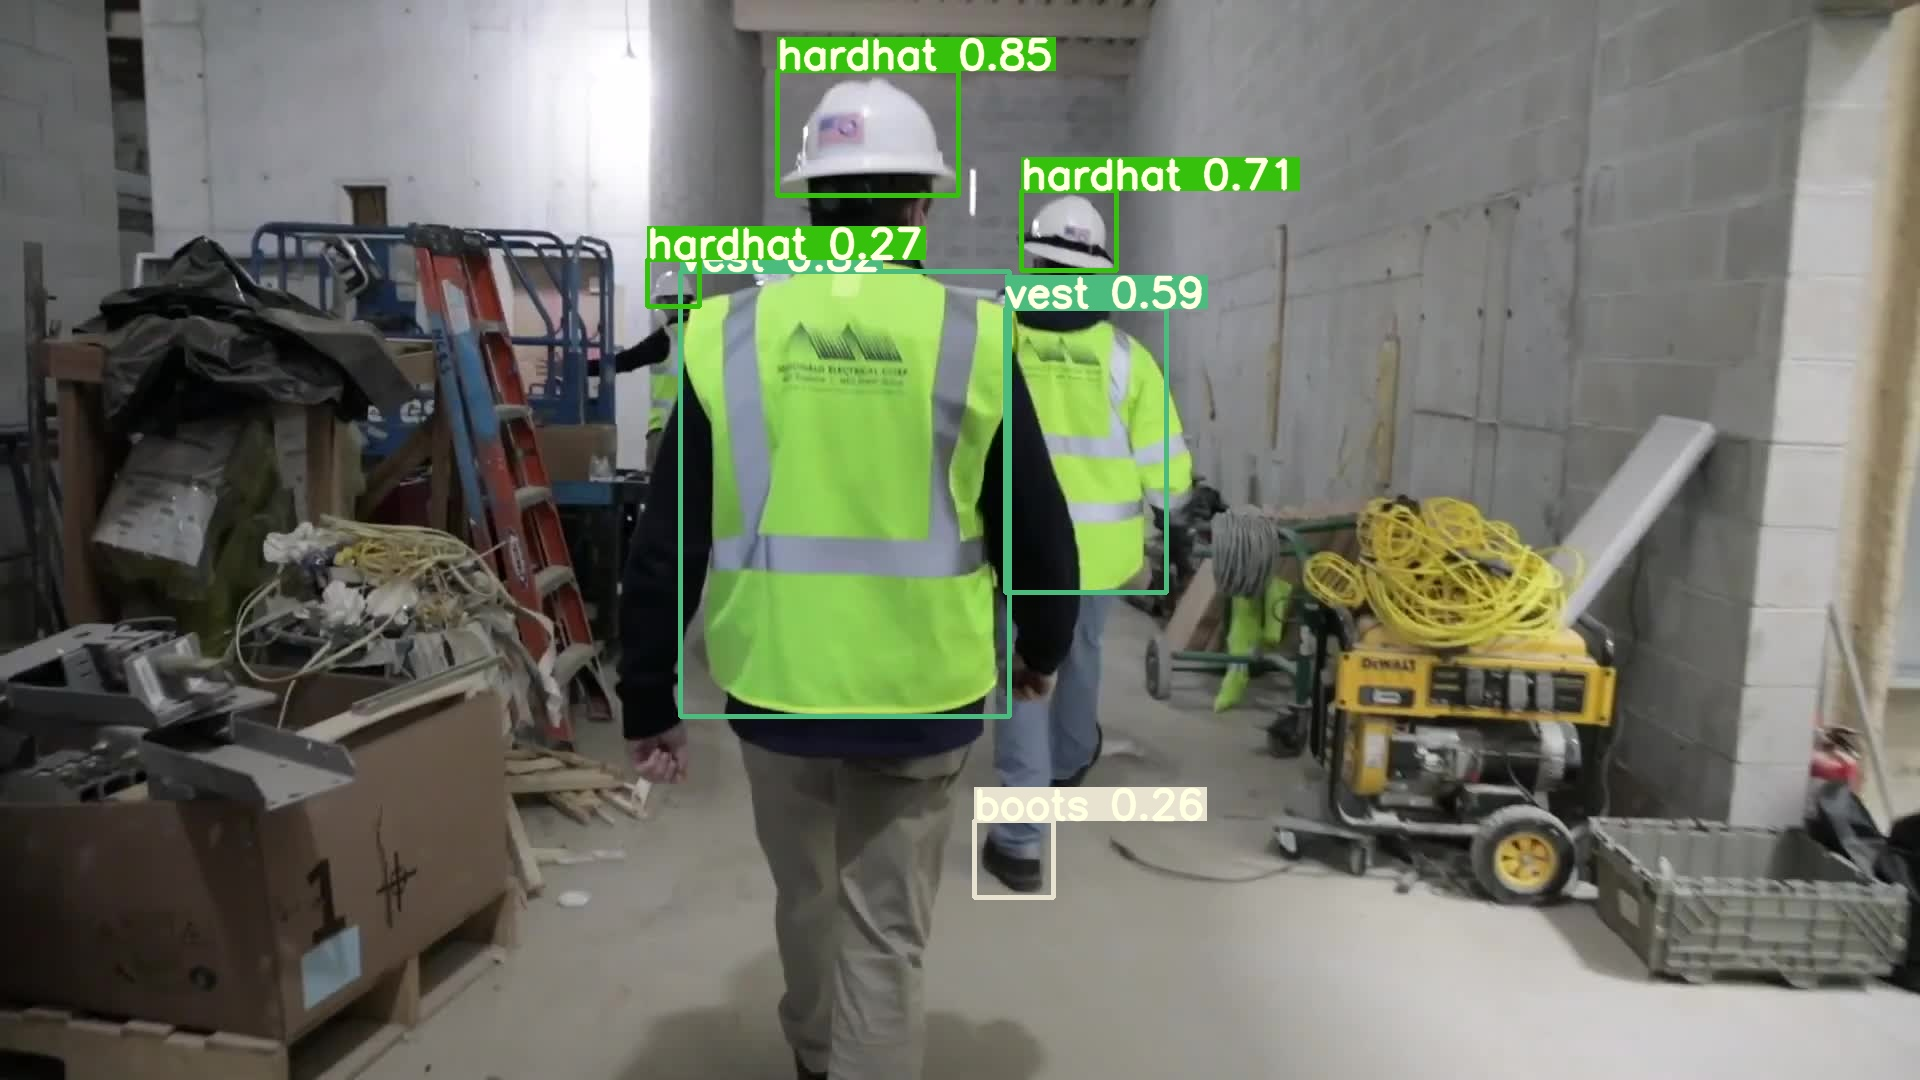

In [13]:
#!ls output
Image(filename='output/image-001.jpg', width=600)

In [14]:
!cp -r 'output' '/content/gdrive/My Drive/EVA5/week13/output' 

#Image(filename='out_out/img002.jpg', width=600)

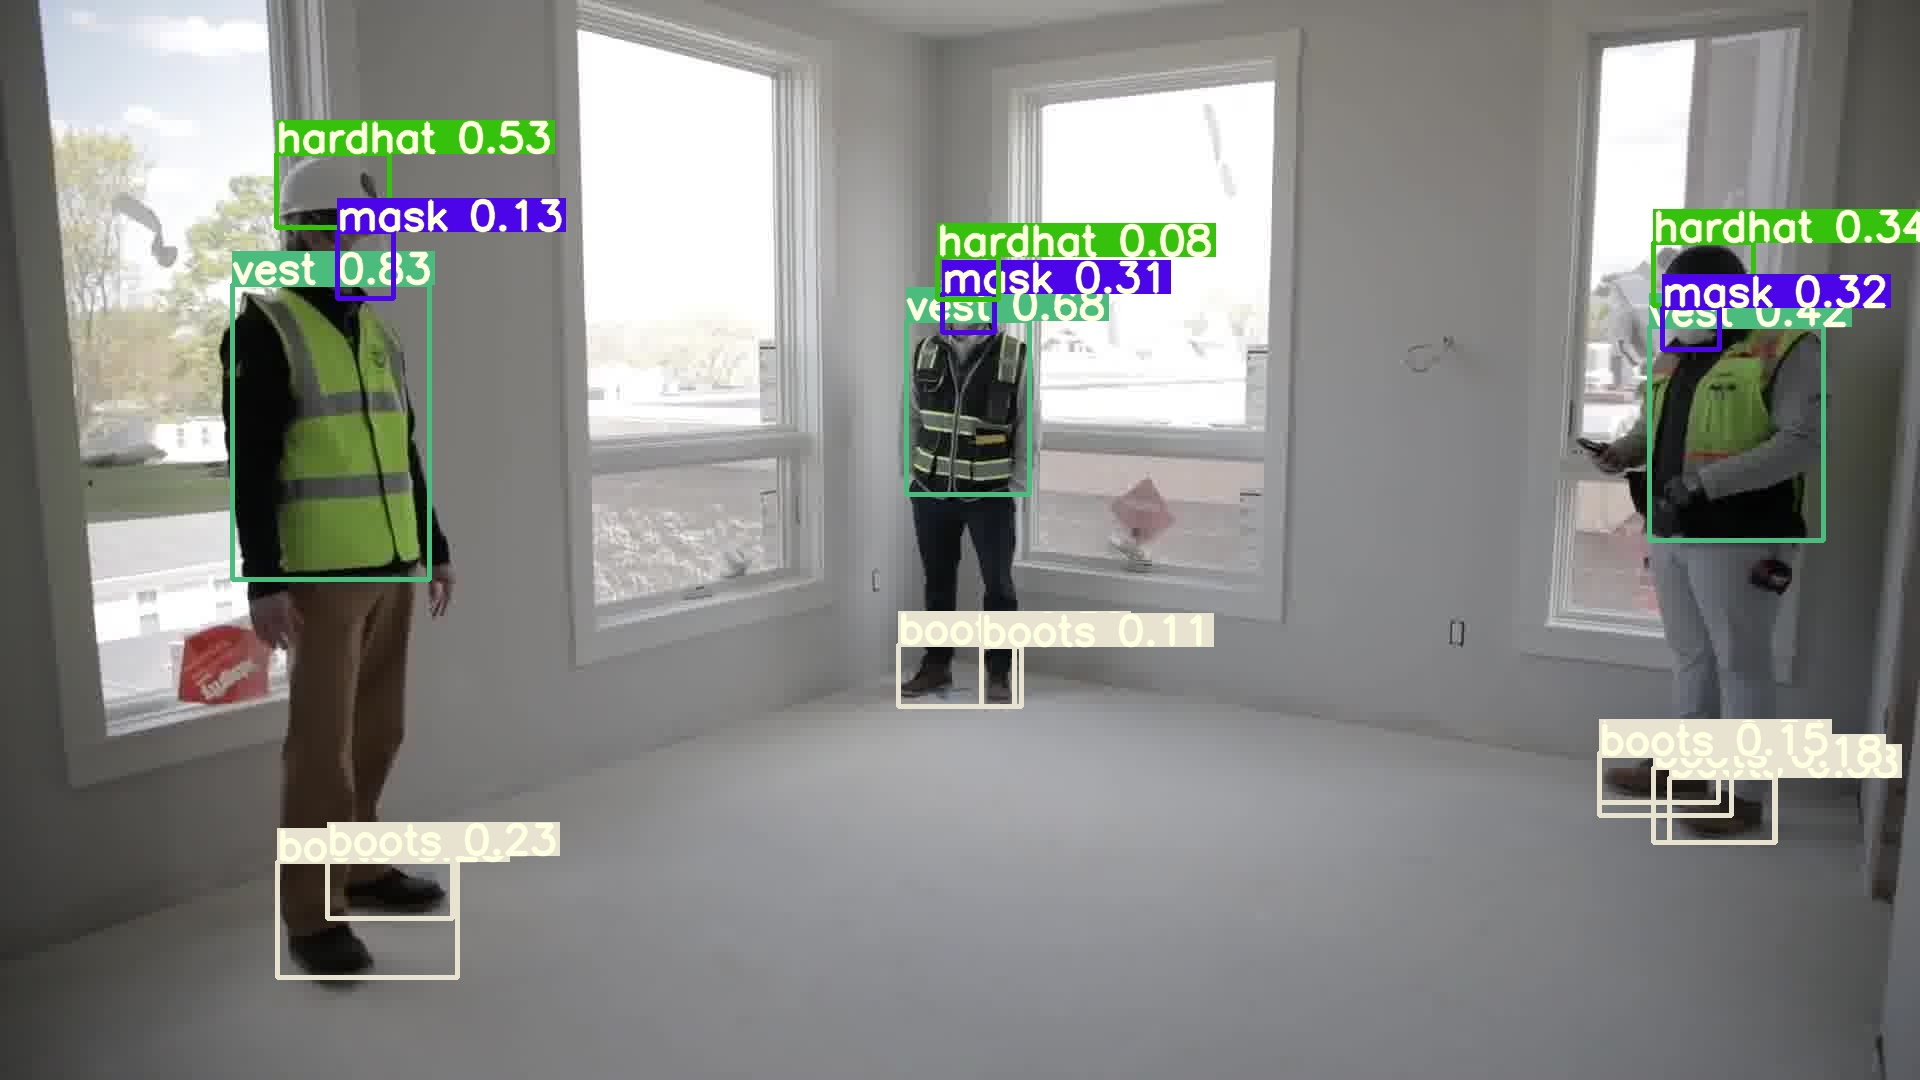

In [18]:
Image(filename='output/image-200.jpg', width=600)

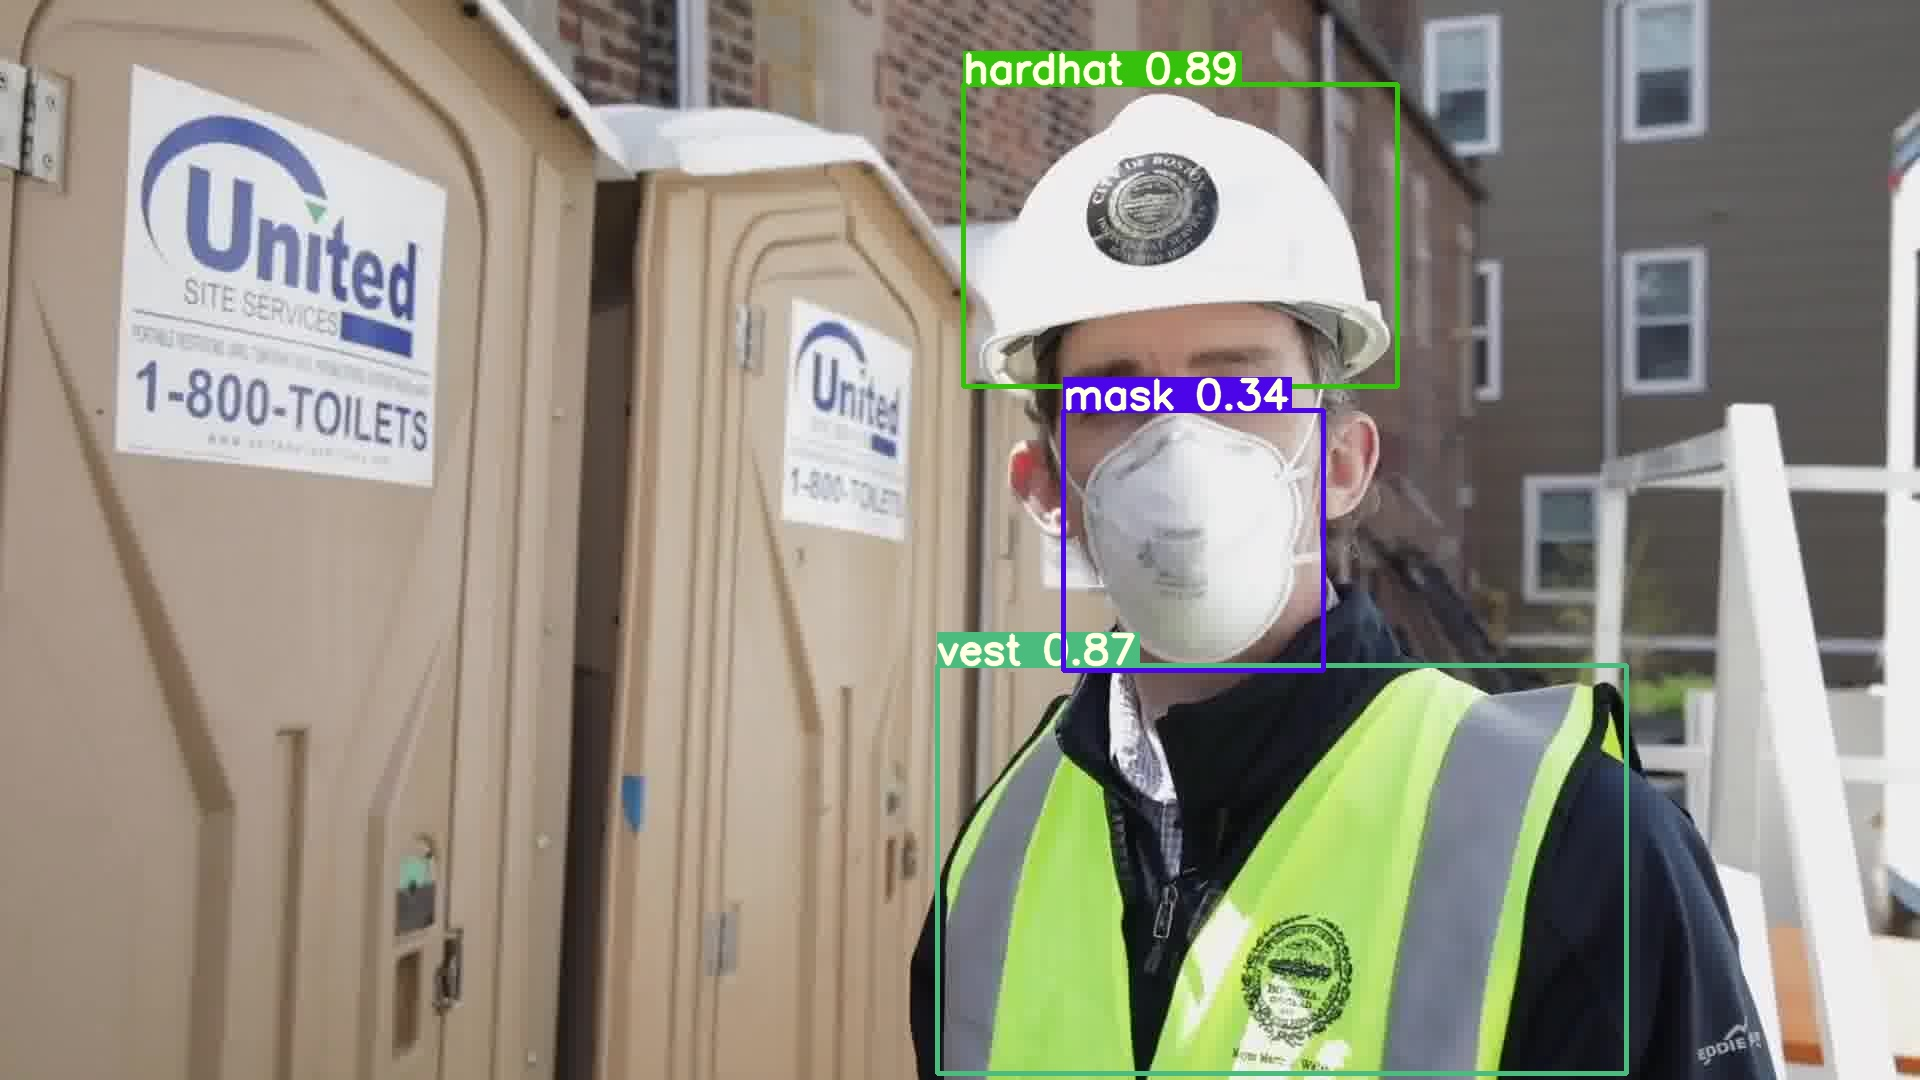

In [21]:
Image(filename='output/image-290.jpg', width=600)